# Linear SVM

## 1. Load data

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.optimize import minimize
from scipy.io import loadmat

In [4]:
mat = loadmat('./data/ex6data1.mat')
X, y = mat['X'], mat['y']
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

## 2. Visualize data  

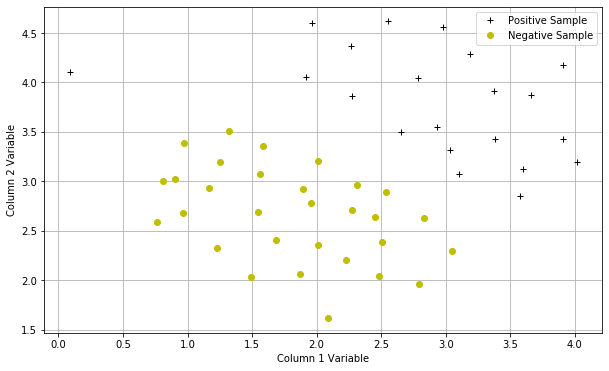

In [6]:
def plotData():
    plt.figure(figsize=(10, 6))
    plt.plot(pos[:,0], pos[:,1], 'k+', label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
plotData()

## 3. Visualize boundary 

In [20]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin, xmax, 100)
    yvals = np.linspace(ymin, ymax, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([xvals[i],yvals[j]]).reshape((1,2))))
    zvals = zvals.transpose() #转置
    #u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

## 4. Try C = 1 

/home/ly/miniconda3/envs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


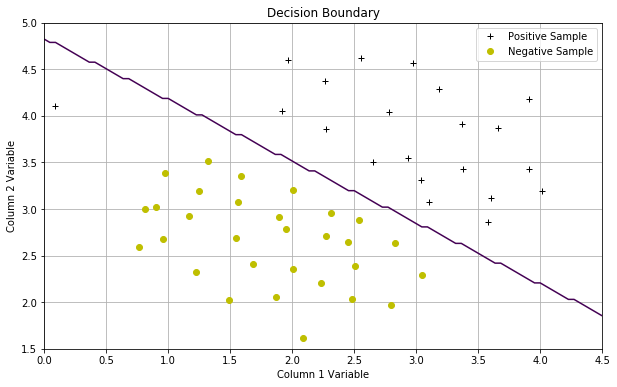

In [21]:
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit(X, y.ravel())
plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)

## 5 Try C = 100

/home/ly/miniconda3/envs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


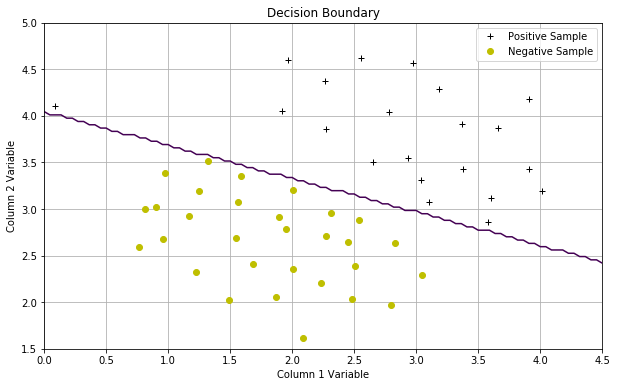

In [22]:
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit(X, y.ravel())
plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)

# SVM with Gaussion Kernels

## 1. Gaussion Kernel

In [30]:
def gaussKernel(x1, x2, sigma):
    sigmasquare = np.power(sigma, 2)
    return np.exp((-(x1 - x2).T.dot(x1 - x2)) / (2 * sigmasquare))
gaussKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.)

0.32465246735834974

## 2. Example dataset 2

In [32]:
mat = loadmat('data/ex6data2.mat')
X, y = mat['X'], mat['y']
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])


## 3. Visualize data 

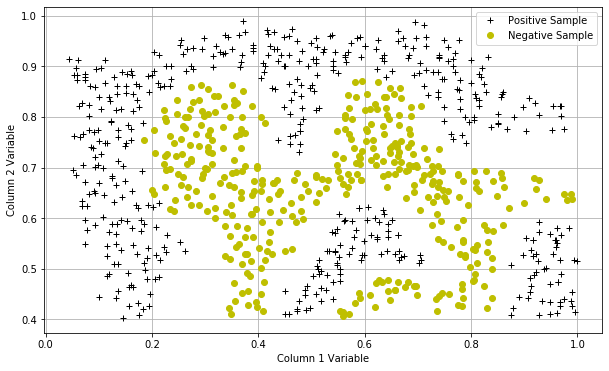

In [33]:
plotData()

## 4. Visualize boundary 

/home/ly/miniconda3/envs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


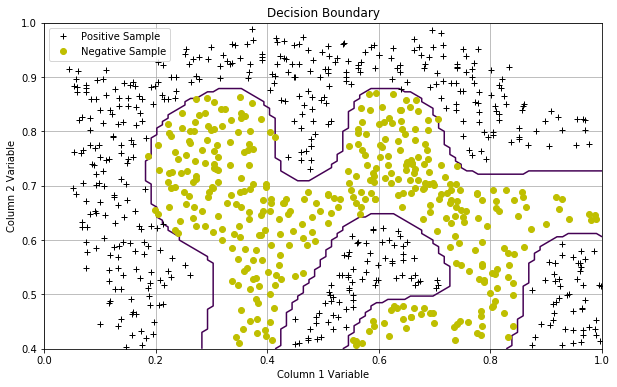

In [34]:
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit( X, y.flatten() )
plotData()
plotBoundary(gaus_svm,0,1,.4,1.0)

## 5. Example dataset 3 

In [35]:
mat = loadmat('data/ex6data3.mat')
X, y = mat['X'], mat['y']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
Xval, yval = mat['Xval'], mat['yval']

## 6. Visualize data 

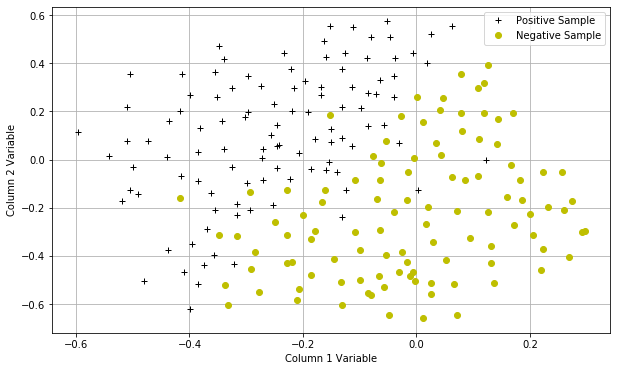

In [36]:
plotData()

## 7. Find the best weights 

In [38]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue,-2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf', gamma=gamma)
        gaus_svm.fit( X, y.flatten() )
        this_score = gaus_svm.score(Xval,yval)
        #print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
print("Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0],best_pair[1],best_score))

Best C, sigma pair is (0.300000, 0.100000) with a score of 0.965000.


## 8. Visualize Boundary

/home/ly/miniconda3/envs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


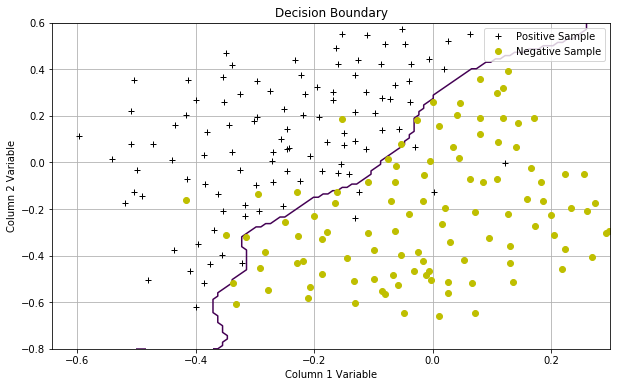

In [39]:
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma = np.power(best_pair[1],-2.))
gaus_svm.fit( X, y.flatten())
plotData()
plotBoundary(gaus_svm,-.5,.3,-.8,.6)